In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerece-sales-data-2024/E-commerece sales data 2024.csv
/kaggle/input/e-commerece-sales-data-2024/product_details.csv
/kaggle/input/e-commerece-sales-data-2024/customer_details.csv


# E-Commerece Sales Dataset

***Import E-commerece data set***

In [2]:
df=pd.read_csv('E-commerece sales data 2024.csv')

***Print head data***

In [3]:
df.head()

,user id,product id,Interaction type,Time stamp,Unnamed: 4
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN
3,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN


***Basic Information of E-Commerece data***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user id           2999 non-null   float64
 1   product id        2999 non-null   object 
 2   Interaction type  2871 non-null   object 
 3   Time stamp        2999 non-null   object 
 4   Unnamed: 4        0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 128.8+ KB


***Check Null value***

In [5]:
df.isnull().sum()

user id              295
product id           295
Interaction type     423
Time stamp           295
Unnamed: 4          3294
dtype: int64

***Reomve raw columns***

In [6]:
remove=['Unnamed: 4','product id']

***Drop Columns ***

In [7]:
df.drop(columns=remove,inplace=True)

***Drop null value***

In [8]:
df=df.dropna()

***Interaction type of Buyer***

In [9]:
df['Interaction type'].value_counts()

Interaction type
like        1145
view         871
purchase     855
Name: count, dtype: int64

***Ploting of Interaction Type by Buyer***

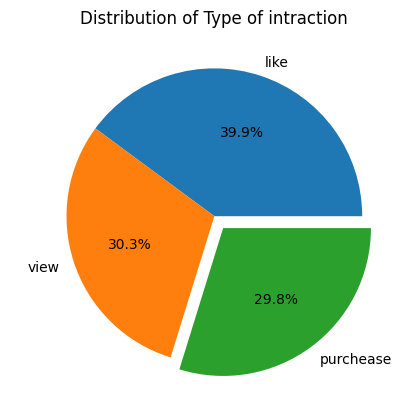

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Interaction type'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['like','view','purchease'],explode=[0,0,0.1])
plt.ylabel(' ')
plt.title('Distribution of Type of intraction')
plt.show()

***Import E-Commerece Sales data***

# Product Details Dataset

In [11]:
df1=pd.read_csv('e-commerece-sales-data-2024/product_details.csv')

***Showing head***

In [12]:
df1.head()

,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


***Check Null Value***

In [13]:
df1.isnull().sum()

Uniqe Id                     0
Product Name                 0
Brand Name               10002
Asin                     10002
Category                   830
Upc Ean Code              9968
List Price               10002
Selling Price              107
Quantity                 10002
Model Number              1772
About Product              273
Product Specification     1632
Technical Details          790
Shipping Weight           1138
Product Dimensions        9523
Image                        0
Variants                  7524
Sku                      10002
Product Url                  0
Stock                    10002
Product Details          10002
Dimensions               10002
Color                    10002
Ingredients              10002
Direction To Use         10002
Is Amazon Seller             0
Size Quantity Variant    10002
Product Description      10002
dtype: int64

***Remove all Unusefull columns from dataset***

In [14]:
remove_col=['Stock' ,'Product Details'          
,'Dimensions'               
,'Color'                    
,'Ingredients'            
,'Direction To Use','Size Quantity Variant','Product Description','Quantity','List Price','Variants',
           'Brand Name','Asin','Upc Ean Code','Product Dimensions','Image','Product Url','Product Url','Sku','Product Specification','Uniqe Id','Model Number']

In [15]:
df1=df1.drop(columns=remove_col)

***Drop NULL value***

In [16]:
df1=df1.dropna()

***Bacis Information of sales data***

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7683 entries, 1 to 10001
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product Name       7683 non-null   object
 1   Category           7683 non-null   object
 2   Selling Price      7683 non-null   object
 3   About Product      7683 non-null   object
 4   Technical Details  7683 non-null   object
 5   Shipping Weight    7683 non-null   object
 6   Is Amazon Seller   7683 non-null   object
dtypes: object(7)
memory usage: 480.2+ KB


***Category of Sales***

In [18]:
category=df1['Category'].value_counts().reset_index().head(20)
styled_table = category.style.set_table_styles([
    {'selector': 'th', 'props': [('background', '#f7f7f9'), ('color', 'black'), ('font-weight', 'bold')]},
])

styled_table

,Category,count
0,Toys & Games | Puzzles | Jigsaw Puzzles,269
1,Toys & Games | Games & Accessories | Board Games,265
2,Toys & Games | Stuffed Animals & Plush Toys | Stuffed Animals & Teddy Bears,243
3,Toys & Games | Toy Figures & Playsets | Action Figures,226
4,Toys & Games | Party Supplies,191
5,Toys & Games | Dolls & Accessories | Dolls,185
6,Toys & Games | Dress Up & Pretend Play | Costumes,150
7,Toys & Games | Hobbies | Remote & App Controlled Vehicles & Parts | Remote & App Controlled Vehicle Parts,149
8,Toys & Games | Arts & Crafts,128
9,Toys & Games | Novelty & Gag Toys,128


***Distribution of seller By Amazon(YES/NO)***

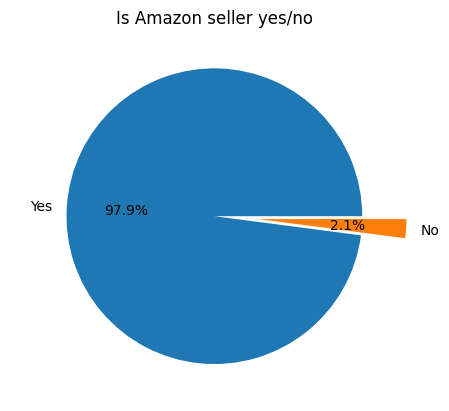

In [19]:
df1['Is Amazon Seller'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['Yes','No'],explode=[0,0.3])
plt.ylabel(' ')
plt.title('Is Amazon seller yes/no')
plt.show()

# Customer Dataset

***Import Customer dataset***

In [20]:
df3=pd.read_csv('e-commerece-sales-data-2024/customer_details.csv')
df3.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


***Information of dataset***

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

***Distribution of gender***

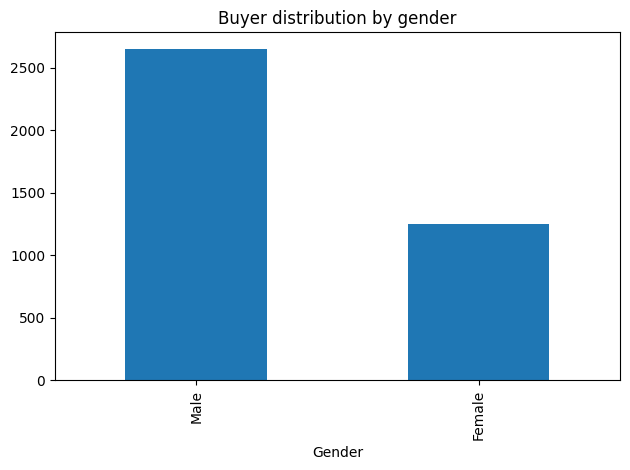

In [22]:
df3['Gender'].value_counts().plot(kind='bar')
plt.title('Buyer distribution by gender')
plt.tight_layout()
plt.show()

***Purchase  Category of Customer***

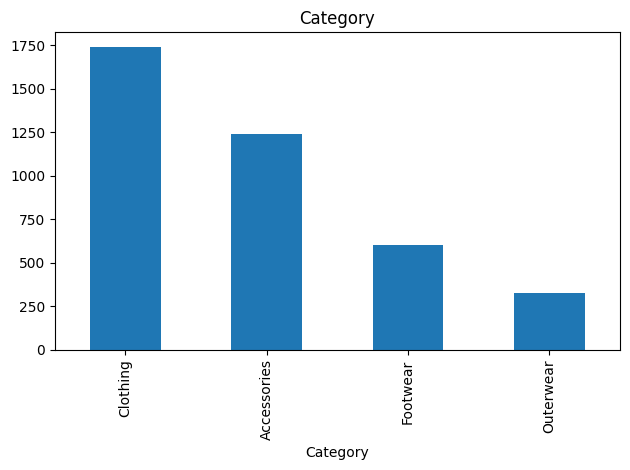

In [23]:
df3['Category'].value_counts().plot(kind='bar')
plt.title('Category')
plt.tight_layout()
plt.show()

***Item Purchased Distribution***

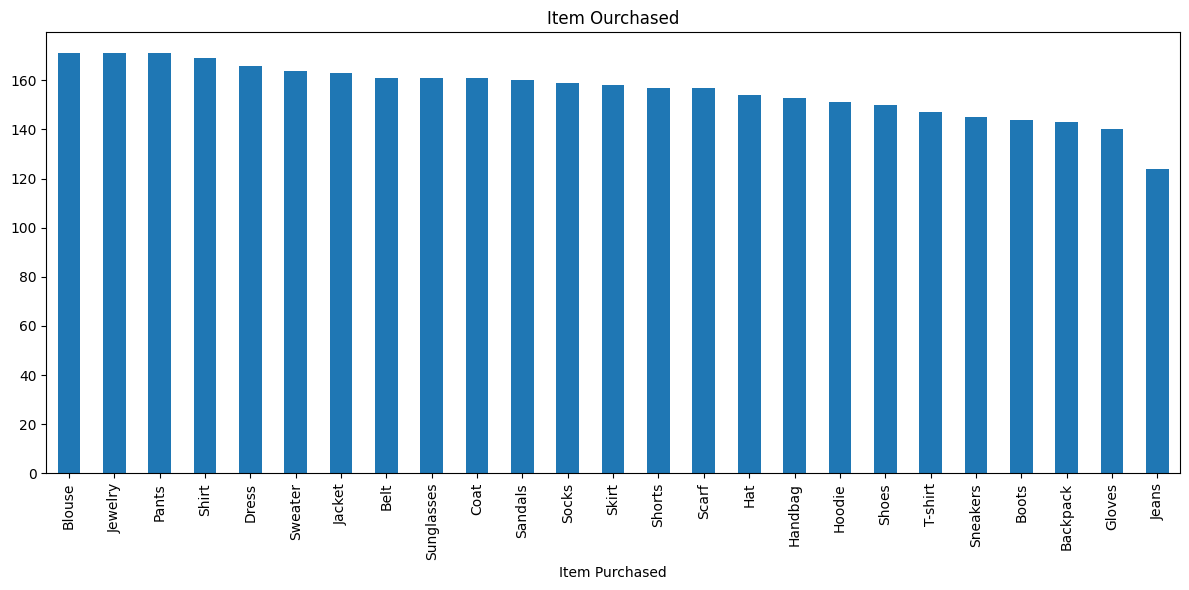

In [24]:
plt.figure(figsize=(12,6))
df3['Item Purchased'].value_counts().plot(kind='bar')
plt.title('Item Ourchased')
plt.tight_layout()
plt.show()

***season vise customer***

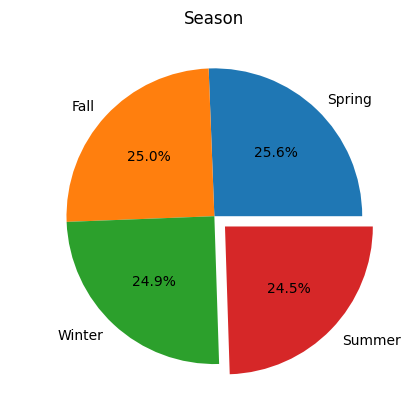

In [25]:
df3['Season'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['Spring','Fall','Winter','Summer'],explode=[0,0,0,0.1])
plt.ylabel(' ')
plt.title('Season')
plt.show()

***Frequency of Purchases***

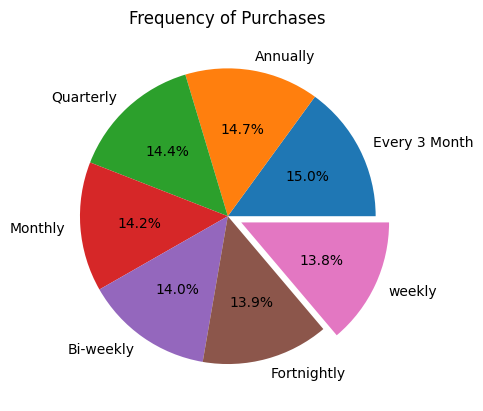

In [26]:
df3['Frequency of Purchases'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['Every 3 Month','Annually','Quarterly','Monthly','Bi-weekly','Fortnightly','weekly'],explode=[0,0,0,0,0,0,0.1])
plt.ylabel(' ')
plt.title('Frequency of Purchases')
plt.show()

***Payment Method***

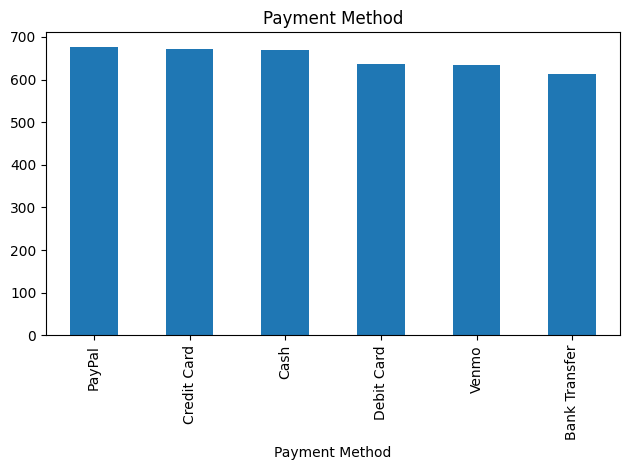

In [27]:
df3['Payment Method'].value_counts().plot(kind='bar')
plt.title('Payment Method')
plt.tight_layout()
plt.show()